In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
# 导入多项式回归模型
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

参数Eta的确定：

![](./eta.png)

In [14]:
def getEta(xArr):
    """
    返回参数 η：依塔 Eta
    :param xArr:
    :return:
    """
    eta = []
    for i, tn in enumerate(xArr):
        item = tn
        if i == 0:
            item += tn / len(xArr)
            eta.append(item)
        else:
            count = 0
            for j in range(i, -1, -1):
                if j < 1: continue
                if xArr[i] == xArr[j - 1]:
                    count += 1
                    continue
                else:
                    item += (tn - xArr[i - count - 1]) / ((count + 1) * len(xArr))
                    eta.append(item)
                    break
    return eta

故障率函数：

![](./rate.png)

In [5]:
def failRate(xArr):
    """
    故障率函数
    :param xArr:
    :return:
    """
    eta = getEta(xArr)
    t = np.array(xArr)
    xMat = t/eta
    x = xMat

    alpha, beta, lamda = 0.5384, 0.1967, 0.8499

    """故障率函数"""
    res = ((lamda*np.power(x, alpha-1))/(eta*np.power(1-x, beta+1)))*((beta-alpha)*x+alpha)
    return res

In [6]:
def distinct(xArr, yArr):
    """去重"""
    X, Y = [], []
    for i in range(0, len(xArr)):
        x, y = xArr[i], yArr[i]
        for j in range(i+1, len(xArr)):
            if xArr[i] != xArr[j]:
                X.append(x)
                Y.append(yArr[j-1])
                break
            else:
                if j == len(xArr)-1:
                    X.append(x)
                    Y.append(yArr[j])
                break
    return X, Y

In [7]:
xArr = [0.1, 0.2, 1, 1, 1, 1, 1, 2, 3, 6, 7, 11, 12, 18, 18, 18, 18, 18, 21, 32, 36, 40, 45,
            46, 47, 50, 55, 60, 63, 63, 67, 67, 67, 67, 72, 75, 79, 82, 82, 83, 84, 84, 84, 85,
            85, 85, 85, 85, 86, 86]
yArr = failRate(xArr)
x, y = distinct(xArr, yArr)
print(x)
print(y)

[0.1, 0.2, 1, 2, 3, 6, 7, 11, 12, 18, 21, 32, 36, 40, 45, 46, 47, 50, 55, 60, 63, 67, 72, 75, 79, 82, 83, 84, 85, 86]
[189.03302103953698, 211.7352420705561, 162.9567979404864, 21.17352420705561, 22.75342430271532, 7.057841402351966, 26.63913755537668, 5.599785699241072, 29.534807119152088, 25.696256562084606, 8.879712518458895, 2.0570167477729644, 6.986719805624829, 7.129253991406324, 5.589375844499862, 38.357128349594355, 38.518880587689544, 10.490402714615415, 5.8088202220039635, 5.906961423830417, 25.120398017599403, 41.28848208831509, 6.118590887864794, 11.350484900077026, 8.131292177658572, 26.450188511365987, 43.05889172311581, 160.65301892503376, 296.7239855917915, 99.35940517292123]


In [13]:
print(len(x))
print(len(y))
print(len(xArr))
print(len(yArr))

30
30
50
50


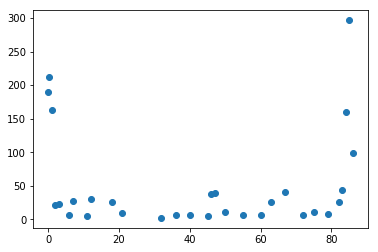

In [6]:
plt.scatter(x, y)
plt.show()

使用二次多项式拟合：

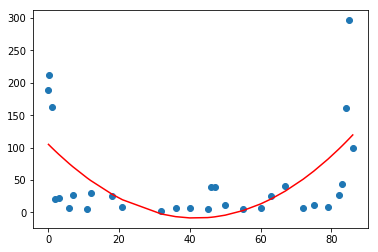

In [7]:
poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])
X = np.array(x)
X = X.reshape(-1, 1)

poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

使用十次多项式拟合：

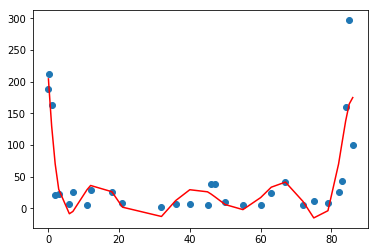

In [8]:
poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=10)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])
X = np.array(x)
X = X.reshape(-1, 1)

poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

使用四次多项式拟合：
$$
f(x) = w_{0} + w_{1}x^1 + w_{2}x^2 + w_{3}x^3 + w_{4}x^4
$$

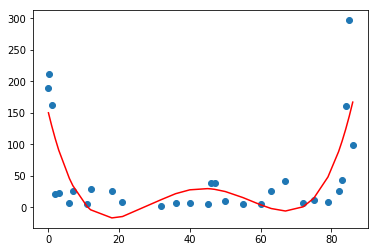

In [9]:
poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=4)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])
X = np.array(x)
X = X.reshape(-1, 1)

poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()